# Train a VAE on L1000 Data

In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd

sys.path.insert(0, "../../scripts")
from utils import load_data, infer_L1000_features
import matplotlib.pyplot as plt

from tensorflow import keras


from vae import VAE
from tensorflow.keras.models import Model, Sequential
import seaborn
import tensorflow as tf

/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubun

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# np.random.seed(123)
# python_random.seed(123)
# tf.random.set_random_seed(1234)

<IPython.core.display.Javascript object>

In [4]:
data_splits = ["train", "valid", "test", "complete"]
# data_splits = ["train", "valid", "test"]
data_dict = load_data(data_splits, dataset="L1000")

/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<IPython.core.display.Javascript object>

In [5]:
# Prepare data for training

meta_features = infer_L1000_features(data_dict["train"], metadata=True)
profile_features = infer_L1000_features(data_dict["train"])

train_features_df = data_dict["train"].reindex(profile_features, axis="columns")
train_meta_df = data_dict["train"].reindex(meta_features, axis="columns")

valid_features_df = data_dict["valid"].reindex(profile_features, axis="columns")
valid_meta_df = data_dict["valid"].reindex(meta_features, axis="columns")

test_features_df = data_dict["test"].reindex(profile_features, axis="columns")
test_meta_df = data_dict["test"].reindex(meta_features, axis="columns")

complete_features_df = data_dict["complete"].reindex(profile_features, axis="columns")
complete_meta_df = data_dict["complete"].reindex(meta_features, axis="columns")

<IPython.core.display.Javascript object>

In [6]:
print(train_features_df.shape)
train_features_df.head(3)

(473357, 978)


,5720,466,6009,2309,387,3553,427,5898,23365,6657,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,0.50000,0.40161,0.47144,0.55614,0.55632,0.31969,0.53926,0.56644,0.52369,0.55536,...,0.49597,0.45675,0.49108,0.51580,0.54461,0.49574,0.43700,0.39799,0.48912,0.48931
1,0.47916,0.48055,0.51255,0.48437,0.49067,0.52890,0.48063,0.49339,0.51228,0.51348,...,0.47000,0.53472,0.49528,0.47458,0.50252,0.50787,0.50386,0.49406,0.47674,0.50935
2,0.47000,0.49714,0.48249,0.47841,0.44375,0.56326,0.47118,0.57873,0.48876,0.57900,...,0.44789,0.62038,0.57187,0.68259,0.47297,0.54169,0.35424,0.48640,0.53255,0.69464


<IPython.core.display.Javascript object>

In [7]:
print(valid_features_df.shape)
valid_features_df.head(3)

(59170, 978)


,5720,466,6009,2309,387,3553,427,5898,23365,6657,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,0.45070,0.45896,0.43257,0.46820,0.50401,0.56620,0.50224,0.53184,0.65207,0.64534,...,0.46928,0.57507,0.49061,0.46446,0.50172,0.57097,0.46011,0.52426,0.46807,0.48020
1,0.45425,0.45655,0.55627,0.45344,0.41747,0.50474,0.44479,0.50642,0.48069,0.51448,...,0.55786,0.55200,0.17895,0.52133,0.64832,0.46035,0.41023,0.56867,0.54315,0.48240
2,0.53887,0.50122,0.47360,0.48316,0.51168,0.51561,0.46108,0.47351,0.51593,0.51437,...,0.47726,0.51451,0.49328,0.50635,0.51482,0.46918,0.52364,0.46848,0.49668,0.49142


<IPython.core.display.Javascript object>

In [8]:
print(test_features_df.shape)
test_features_df.head(3)

(59170, 978)


,5720,466,6009,2309,387,3553,427,5898,23365,6657,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,0.53434,0.50467,0.55563,0.46353,0.52324,0.58502,0.48914,0.49757,0.53704,0.47561,...,0.47165,0.48934,0.44289,0.51932,0.49182,0.47676,0.48990,0.51227,0.43954,0.47396
1,0.48668,0.53784,0.51025,0.49951,0.48705,0.48007,0.52366,0.52408,0.46196,0.48543,...,0.53182,0.49595,0.44961,0.74233,0.51408,0.48487,0.54264,0.49391,0.51607,0.42824
2,0.52485,0.62625,0.52278,0.46507,0.47526,0.43233,0.59549,0.52586,0.62759,0.56047,...,0.58944,0.49044,0.40534,0.63194,0.46684,0.38153,0.47605,0.47075,0.48671,0.49489


<IPython.core.display.Javascript object>

In [9]:
print(complete_features_df.shape)
complete_features_df.head(3)

(591697, 978)


,5720,466,6009,2309,387,3553,427,5898,23365,6657,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,0.53869,0.45908,0.50948,0.49270,0.46730,0.51031,0.53130,0.48697,0.51847,0.51643,...,0.44041,0.49694,0.47472,0.51696,0.49333,0.53256,0.50985,0.50004,0.49410,0.47296
1,0.46772,0.45946,0.52295,0.48877,0.48322,0.64023,0.49371,0.51525,0.45523,0.67193,...,0.40819,0.57537,0.47144,0.55874,0.74965,0.54541,0.39085,0.42031,0.48996,0.40075
2,0.22752,0.61969,0.56399,0.60839,0.61666,0.58247,0.60020,0.52331,0.61709,0.62676,...,0.48236,0.61442,0.48149,0.72095,0.40028,0.45776,0.55088,0.23296,0.37950,0.60474


<IPython.core.display.Javascript object>

In [10]:
# VAE of one layer
encoder_architecture = []
decoder_architecture = []


<IPython.core.display.Javascript object>

In [11]:
# model from optimal hyperparameters for onelayer obtained from 1.optimize
L1000_vae = VAE(
    input_dim=train_features_df.shape[1],
    latent_dim=5,
    batch_size=768,
    encoder_batch_norm=False,
    epochs=14,
    learning_rate=0.0001,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=1,
    verbose=True,
)
L1000_vae.compile_vae()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<IPython.core.display.Javascript object>

In [12]:
L1000_vae.train(x_train=train_features_df, x_test=valid_features_df)

Train on 473357 samples, validate on 59170 samples
Epoch 1/14
473357/473357 [==============================] - 25s 53us/sample - loss: 678.2435 - val_loss: 677.7893
Epoch 2/14
473357/473357 [==============================] - 26s 54us/sample - loss: 677.6991 - val_loss: 677.6545
Epoch 3/14
473357/473357 [==============================] - 24s 51us/sample - loss: 677.6412 - val_loss: 677.6301
Epoch 4/14
473357/473357 [==============================] - 24s 51us/sample - loss: 677.6242 - val_loss: 677.6183
Epoch 5/14
473357/473357 [==============================] - 25s 52us/sample - loss: 677.6153 - val_loss: 677.6120
Epoch 6/14
473357/473357 [==============================] - 24s 50us/sample - loss: 677.6109 - val_loss: 677.6092
Epoch 7/14
473357/473357 [==============================] - 24s 51us/sample - loss: 677.6091 - val_loss: 677.6082
Epoch 8/14
473357/473357 [==============================] - 24s 51us/sample - loss: 677.6085 - val_loss: 677.6079
Epoch 9/14
473357/473357 [===========

<IPython.core.display.Javascript object>

In [13]:
L1000_vae.vae

<IPython.core.display.Javascript object>

In [14]:
# Save training performance
history_df = pd.DataFrame(L1000_vae.vae.history.history)
history_df

,loss,val_loss
0,678.243489,677.789278
1,677.699136,677.654476
2,677.641234,677.630147
3,677.624164,677.618290
4,677.615281,677.612034
5,677.610936,677.609184
6,677.609094,677.608236
7,677.608504,677.607920
8,677.608347,677.607998
9,677.608303,677.607970


<IPython.core.display.Javascript object>

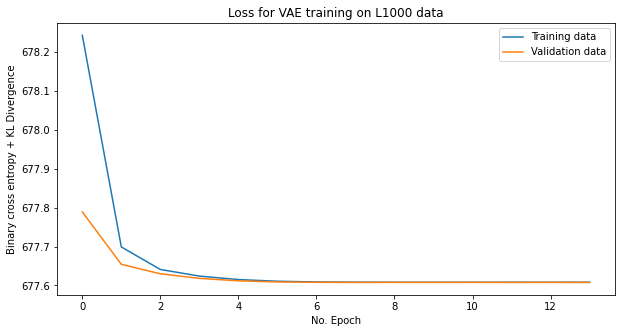

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(history_df["loss"], label="Training data")
plt.plot(history_df["val_loss"], label="Validation data")
plt.title("Loss for VAE training on L1000 data")
plt.ylabel("Binary cross entropy + KL Divergence")
plt.xlabel("No. Epoch")
plt.legend()
plt.show()

In [16]:
# evaluating performance using test set
L1000_vae.vae.evaluate(test_features_df)

59170/59170 [==============================] - 5s 88us/sample - loss: 677.6053


677.6053411197839

<IPython.core.display.Javascript object>

In [17]:
reconstruction = pd.DataFrame(
    L1000_vae.vae.predict(test_features_df), columns=profile_features
)
(sum(sum((np.array(test_features_df) - np.array(reconstruction)) ** 2))) ** 0.5

444.9193649083791

<IPython.core.display.Javascript object>

<AxesSubplot:>

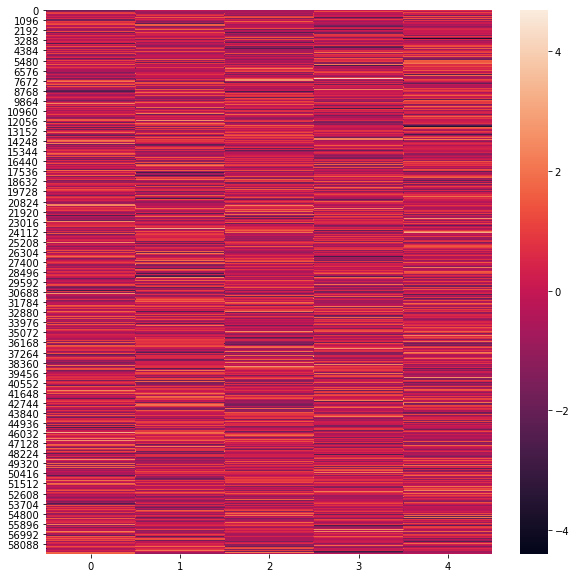

<IPython.core.display.Javascript object>

In [18]:
# latent space heatmap
fig, ax = plt.subplots(figsize=(10, 10))
encoder = L1000_vae.encoder_block["encoder"]
latent = np.array(encoder.predict(test_features_df)[2])
seaborn.heatmap(latent, ax=ax)

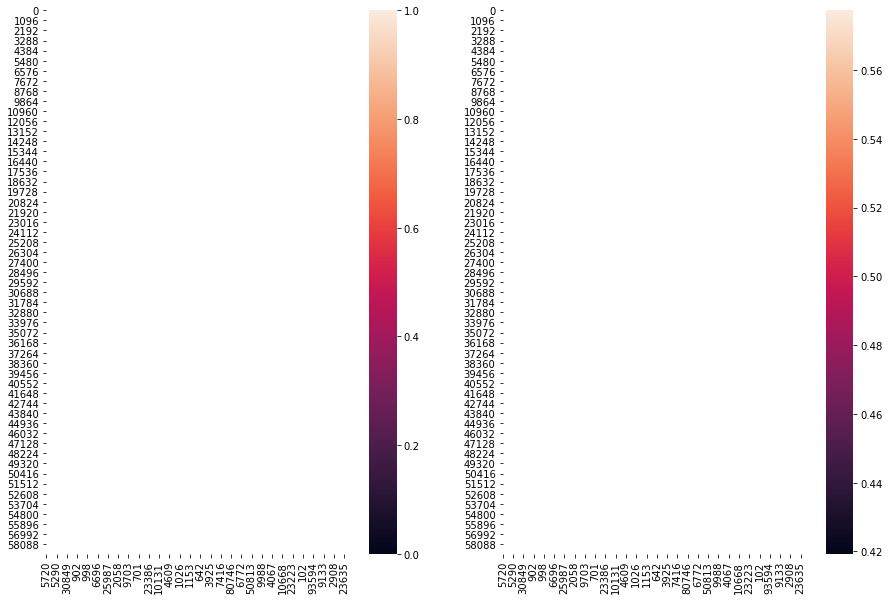

<IPython.core.display.Javascript object>

In [19]:
# original vs reconstructed heatmap
reconstruction = pd.DataFrame(
    L1000_vae.vae.predict(test_features_df), columns=profile_features
)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
seaborn.heatmap(test_features_df, ax=ax1)
seaborn.heatmap(reconstruction, ax=ax2)
plt.show()

<AxesSubplot:>

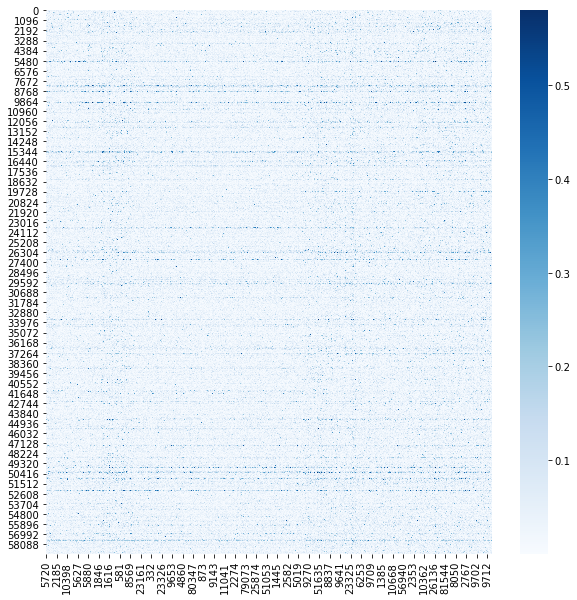

<IPython.core.display.Javascript object>

In [20]:
#difference between original and reconstructed heatmap
difference = abs(reconstruction - test_features_df)
fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(difference, ax=ax, cmap="Blues")

<AxesSubplot:>

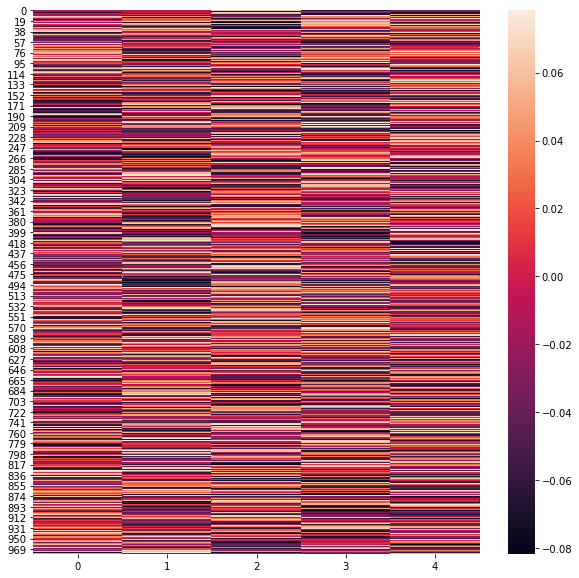

<IPython.core.display.Javascript object>

In [21]:
#encoder heatmap
weights = L1000_vae.encoder_block["encoder"].get_weights()
fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(weights[0], ax=ax)

In [22]:
#NOTE: IF YOU RUN THIS, YOU WILL NOT BE ABLE TO REPRODUCE THE EXACT RESULTS IN THE EXPERIMENT
latent_complete = np.array(encoder.predict(complete_features_df)[2])
latent_df = pd.DataFrame(latent_complete)
latent_df.to_csv("../3.application/latent.csv")

<IPython.core.display.Javascript object>

In [23]:
#NOTE: IF YOU RUN THIS, YOU WILL NOT BE ABLE TO REPRODUCE THE EXACT RESULTS IN THE EXPERIMENT
decoder = L1000_vae.decoder_block["decoder"]
decoder.save("decoder")

<IPython.core.display.Javascript object>